# GUI Features in OpenCV

---

[TOC] table of contents

## Getting started with Images

Import necessary modules
cv.imshow



**Note:**
Images process with Open CV process RGB colored images as Blue, Green, and Red(**BGR**)

cv.imshow has issues with Jupyter notebooks

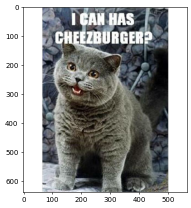

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys


meme_cat = cv.imread(cv.samples.findFile("i_can_has_cheezburger.png"))

# Closes program if image isn't found
if meme_cat is None:
    sys.exit("Could not read the image.")


# Shows image in Jupyter notebook
plt.figure(dpi=50)  # Increase dpi for higher resolution(default=100)
plt.imshow(cv.cvtColor(meme_cat, cv.COLOR_BGR2RGB)) # MatPlotLib reads images in RGB so it needs to be converted
plt.show()
